In [112]:
import matplotlib.pyplot as plt
import pandas as pd
from parse_results import *
from plot_style import *

MODEL_ORDER = ["DebugNet", "KyleNet", "SqueezeNet", "ResNet-18", "ResNet-50", "ResNet-152"]
MODEL_ORDER_2 = ["TinyNet", "SmallNet", "SqueezeNet", "ResNet-18", "ResNet-50", "ResNet-152"]

# Parsl Results & Plots

In [113]:
parsl_dirs = [
    Path("parsl_results/round3_sync"),
    Path("parsl_results/parsl_squeeze_net"),
]
# parsl_df = pd.concat([
#     parse_parsl_results(parsl_dirs),
#     parse_parsl_results(Path("parsl_results/parsl_squeeze_net"), include_dfk=False, include_priming=False),   
# ])
# parsl_df = parsl_df.reset_index(drop=True)
parsl_df = parse_parsl_results(parsl_dirs)
parsl_df.head()

,model,num_workers,start,priming_done,end,start2end,prime2end
0,ResNet-50,16,2.200140e+05,2.201235e+05,2.201537e+05,139.757655,30.241880
1,ResNet-50,32,2.201577e+05,2.202770e+05,2.203461e+05,188.416610,69.040634
2,DebugNet,16,2.140302e+05,2.140502e+05,2.140528e+05,22.563938,2.580433
3,KyleNet,512,9.088571e+06,9.088683e+06,9.088704e+06,133.311446,21.121526
4,DebugNet,2048,4.232896e+06,4.233076e+06,4.233109e+06,212.188808,32.644537


In [114]:
redis_dirs = [
    # Path("parsl_results/redis1_sync"),
    Path("parsl_results/sync_evict_redis_round_2"),
]
redis_df = parse_parsl_results(redis_dirs, include_priming=True)
redis_df.head()

,model,num_workers,start,priming_done,end,start2end,prime2end
0,ResNet-18,512,4.460349e+06,4.460410e+06,4.460616e+06,266.506478,206.237590
1,ResNet-152,4,1.392370e+07,1.392372e+07,1.392373e+07,35.474538,15.782564
2,ResNet-152,8,1.392374e+07,1.392376e+07,1.392378e+07,47.004374,27.258080
3,DebugNet,512,9.288104e+06,9.288162e+06,9.288178e+06,74.773143,16.225449
4,ResNet-152,32,4.371353e+06,4.371375e+06,4.371470e+06,116.854344,94.895457


In [115]:
parsl_df.model.unique()

array(['ResNet-50', 'DebugNet', 'KyleNet', 'ResNet-152', 'ResNet-18',
       'SqueezeNet'], dtype=object)

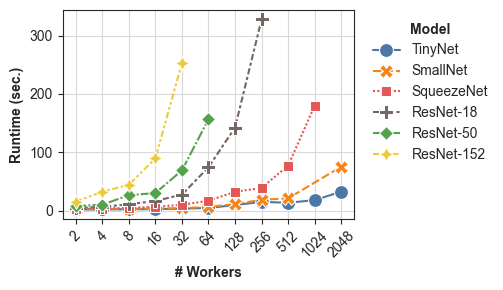

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
tmp = parsl_df.replace({"KyleNet": "SmallNet", "DebugNet": "TinyNet"})
sns.lineplot(
    tmp,
    x="num_workers",
    y="prime2end",
    hue="model",
    style="model",
    hue_order=MODEL_ORDER_2,
    style_order=MODEL_ORDER_2,
    markers=True,
    markersize=10,
    ax=ax
).set(yscale="linear", xscale="log")

# ticks = [2, 16, 128, 1024]
ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
ax.set_xticks(ticks, ticks, rotation=45)
ax.set_ylabel("Runtime (sec.)", weight="bold")
ax.set_xlabel("# Workers", weight="bold")
ax.minorticks_off()

legend = plt.legend(bbox_to_anchor=(1.5, 1), title="Model", frameon=False)
plt.setp(legend.get_title(), weight="bold")
plt.tight_layout()
plt.show()

# Flower Results & Plots

In [117]:
flwr_df = parse_flower_single_node_results([
    Path("flower_results/single_node/"),
    Path("flower_results/multi_node/"),
])
flwr_df.head()

,model,workers,time
0,KyleNet,2,3.184818
1,SqueezeNet,16,7.899091
2,ResNet-152,64,300.489048
3,DebugNet,16,3.877657
4,ResNet-18,32,24.103717


In [118]:
flwr_df.model.unique()

array(['KyleNet', 'SqueezeNet', 'ResNet-152', 'DebugNet', 'ResNet-18',
       'ResNet-50'], dtype=object)

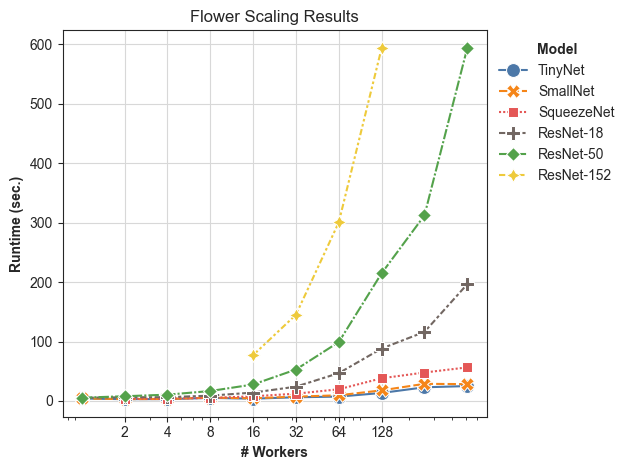

In [119]:
tmp = flwr_df.replace({"KyleNet": "SmallNet", "DebugNet": "TinyNet"})
ax = sns.lineplot(
    tmp,
    x="workers",
    y="time",
    hue="model",
    style="model",
    hue_order=MODEL_ORDER_2,
    style_order=MODEL_ORDER_2,
    markers=True,
    markersize=10,
)
ax.set(yscale="linear", xscale="log")

ticks = [2, 4, 8, 16, 32, 64, 128]
# ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
ax.set_xticks(ticks, ticks)
ax.set_ylabel("Runtime (sec.)", weight="bold")
ax.set_xlabel("# Workers", weight="bold")
# ax.minorticks_off()

legend = plt.legend(bbox_to_anchor=(1, 1), title="Model", frameon=False)
plt.setp(legend.get_title(), weight="bold")
plt.title("Flower Scaling Results")
plt.tight_layout()
plt.show()

# Comparing Parsl and Flower

In [120]:
parsl_tmp = parsl_df.copy()
parsl_tmp = parsl_tmp.rename(columns={"prime2end": "time"})
parsl_tmp = parsl_tmp.rename(columns={"num_workers": "workers"})
parsl_tmp = parsl_tmp.drop(columns=["start", "priming_done", "end", "start2end"])
parsl_tmp = parsl_tmp.replace({"KyleNet": "SmallNet", "DebugNet": "TinyNet"})
parsl_tmp["backend"] = "parsl"
parsl_tmp.head()

,model,workers,time,backend
0,ResNet-50,16,30.241880,parsl
1,ResNet-50,32,69.040634,parsl
2,TinyNet,16,2.580433,parsl
3,SmallNet,512,21.121526,parsl
4,TinyNet,2048,32.644537,parsl


In [121]:
redis_tmp = redis_df.copy()
redis_tmp = redis_tmp.rename(columns={"prime2end": "time"})
redis_tmp = redis_tmp.rename(columns={"num_workers": "workers"})
redis_tmp = redis_tmp.drop(columns=["start", "priming_done", "end", "start2end"])
redis_tmp = redis_tmp.replace({"KyleNet": "SmallNet", "DebugNet": "TinyNet"})
redis_tmp["backend"] = "parsl+redis"
redis_tmp.head()

,model,workers,time,backend
0,ResNet-18,512,206.237590,parsl+redis
1,ResNet-152,4,15.782564,parsl+redis
2,ResNet-152,8,27.258080,parsl+redis
3,TinyNet,512,16.225449,parsl+redis
4,ResNet-152,32,94.895457,parsl+redis


In [122]:
flwr_tmp = flwr_df.copy()
flwr_tmp = flwr_tmp.replace({"KyleNet": "SmallNet", "DebugNet": "TinyNet"})
flwr_tmp["backend"] = "flower"
flwr_tmp.head()

,model,workers,time,backend
0,SmallNet,2,3.184818,flower
1,SqueezeNet,16,7.899091,flower
2,ResNet-152,64,300.489048,flower
3,TinyNet,16,3.877657,flower
4,ResNet-18,32,24.103717,flower


In [123]:
df = pd.concat([parsl_tmp, flwr_tmp, redis_tmp])
df = df.replace({"parsl": "Parsl", "flower": "Flower", "parsl+redis": "Parsl+RedisConnector"})
df.head()

,model,workers,time,backend
0,ResNet-50,16,30.241880,Parsl
1,ResNet-50,32,69.040634,Parsl
2,TinyNet,16,2.580433,Parsl
3,SmallNet,512,21.121526,Parsl
4,TinyNet,2048,32.644537,Parsl


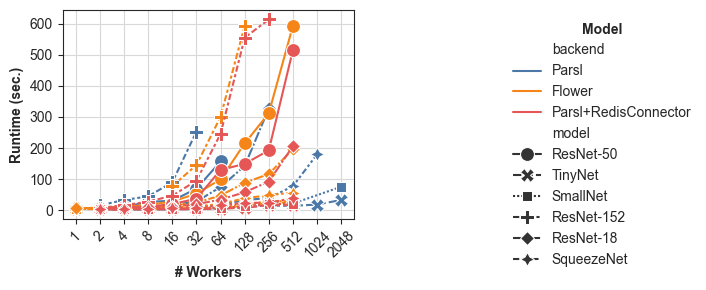

In [124]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.lineplot(
    df,
    x="workers",
    y="time",
    hue="backend",
    style="model",
    # hue_order=MODEL_ORDER_2,
    # style_order=MODEL_ORDER_2,
    markers=True,
    markersize=10,
    ax=ax
).set(yscale="linear", xscale="log")

# ticks = [2, 16, 128, 1024]
ticks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
ax.set_xticks(ticks, ticks, rotation=45)
ax.set_ylabel("Runtime (sec.)", weight="bold")
ax.set_xlabel("# Workers", weight="bold")
ax.minorticks_off()

legend = plt.legend(bbox_to_anchor=(1.5, 1), title="Model", frameon=False)
plt.setp(legend.get_title(), weight="bold")
plt.tight_layout()
plt.show()

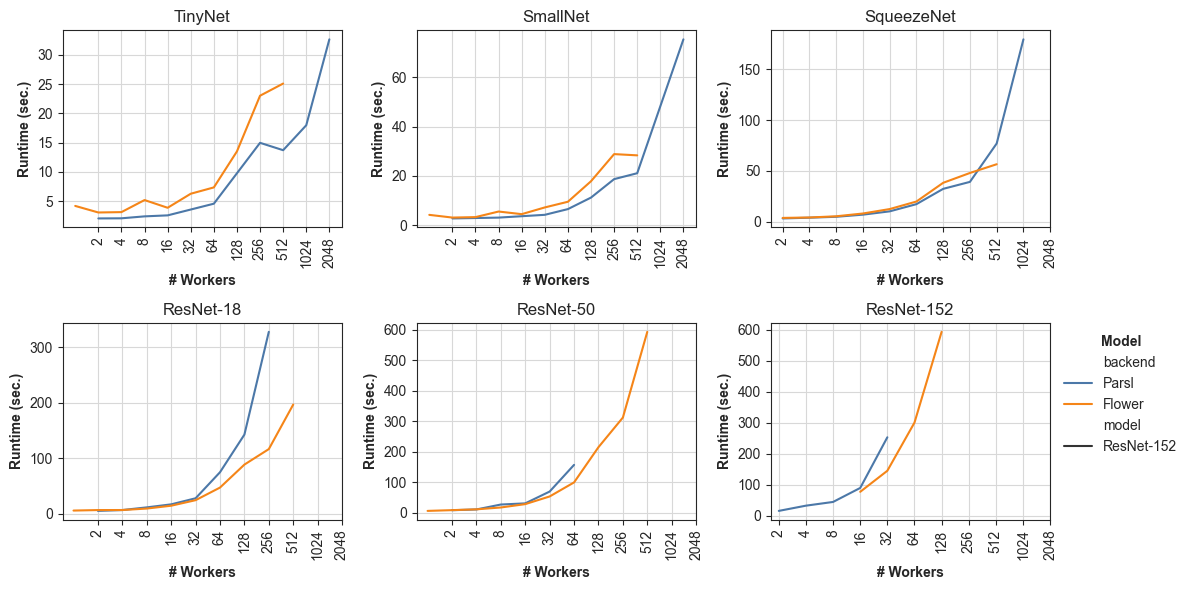

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
for n, model in enumerate(MODEL_ORDER_2):
    i = n // 3
    j = n % 3
    ax = axes[i, j]
    sns.lineplot(
        df.query(f"model == '{model}'"),
        x="workers",
        y="time",
        hue="backend",
        style="model",
        hue_order=["Parsl", "Flower"],
        # style_order=MODEL_ORDER_2,
        markers=False,
        markersize=10,
        ax=ax,
    )
    ax.set(yscale="linear", xscale="log")
    ax.set_title(model)
    ax.get_legend().remove()
    
    # ticks = [2, 16, 128, 1024]
    ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    ax.set_xticks(ticks, ticks, rotation=90)
    ax.set_ylabel("Runtime (sec.)", weight="bold")
    ax.set_xlabel("# Workers", weight="bold")
    ax.minorticks_off()

legend = plt.legend(bbox_to_anchor=(1.5, 1.0), title="Model", frameon=False)
plt.setp(legend.get_title(), weight="bold")
plt.tight_layout()
plt.savefig("quick_plot.pdf", bbox_inches="tight")
plt.show()

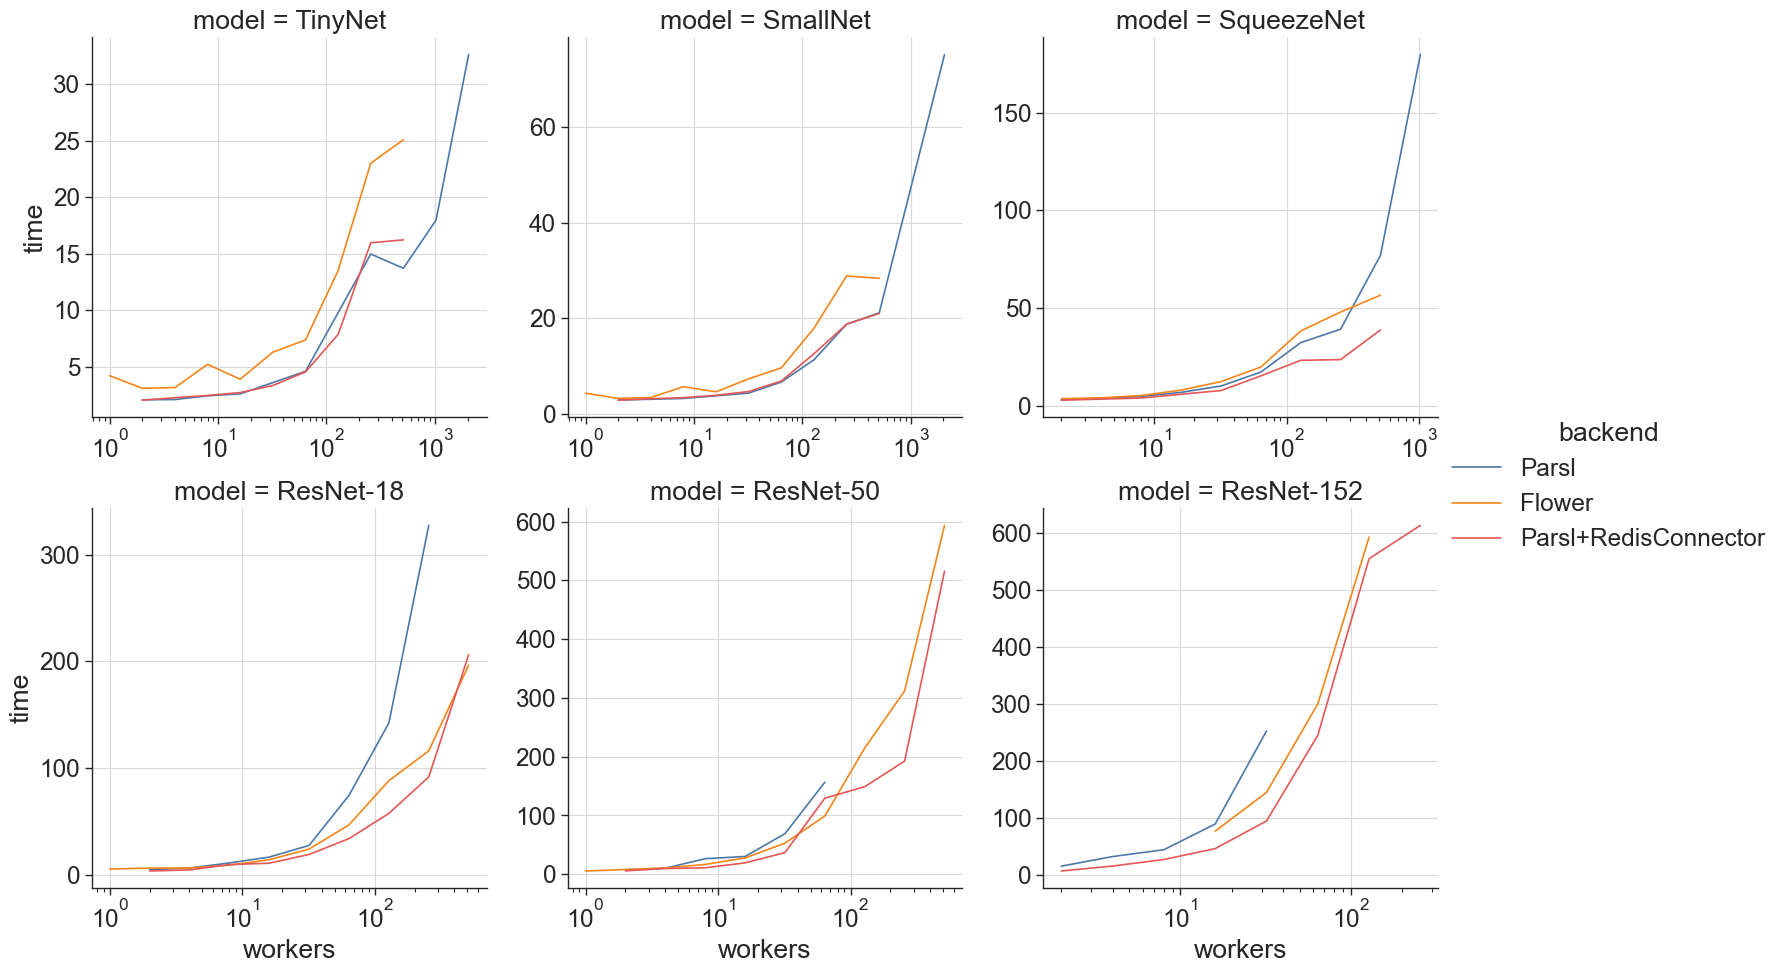

In [126]:
with sns.plotting_context("paper", font_scale=2):
    g = sns.relplot(
        df,
        kind="line",
        col="model",
        col_wrap=3,
        col_order=MODEL_ORDER_2,
        x="workers",
        y="time",
        hue="backend",
        facet_kws={"sharex": False, "sharey": False},
    )
    g.set(xscale="log")
    plt.savefig("comparison_basic.pdf")
    plt.show()

    
# for i, model in enumerate(MODEL_ORDER_2):
#     ax = axes[i]
#     sns.lineplot(
#         df.query(f"model == '{model}'"),
#         x="workers",
#         y="time",
#         hue="backend",
#         style="model",
#         # hue_order=MODEL_ORDER_2,
#         # style_order=MODEL_ORDER_2,
#         markers=False,
#         markersize=10,
#         ax=ax,
#     )
#     ax.set(yscale="linear", xscale="log")
#     ax.set_title(model)
#     ax.get_legend().remove()
    
#     # ticks = [2, 16, 128, 1024]
#     ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
#     ax.set_xticks(ticks, ticks, rotation=45)
#     ax.set_ylabel("Runtime (sec.)", weight="bold")
#     ax.set_xlabel("# Workers", weight="bold")
#     ax.minorticks_off()

# # legend = plt.legend(bbox_to_anchor=(1.5, 1), title="Model", frameon=False)
# plt.setp(legend.get_title(), weight="bold")
# plt.tight_layout()
# plt.show()

In [130]:
def make_comparison_plot(df, yscale: str="linear"):
    axes_w_legend = (0, 1)
    backend_order = ["Parsl", "Flower", "Parsl+RedisConnector"]
    with sns.plotting_context("paper", font_scale=1.0):
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4), sharey=False)
        for n, model in enumerate(MODEL_ORDER_2):
            i = n // 3
            j = n % 3
            ax = axes[i, j]
            tmp = df.query(f"model == '{model}'")
            sns.lineplot(
                tmp,
                x="workers",
                y="time",
                hue="backend",
                style="backend",
                markers=True,
                markersize=8,
                hue_order=backend_order,
                style_order=backend_order,
                linewidth=2,
                ax=ax,
            )
            
            ax.set(xscale="log", yscale=yscale)
        
        ticks = [2, 8, 32, 128, 512, 2048]
        axes[0, 0].set_xticks(ticks, ticks, rotation=45)
        
        ticks = [2, 8, 32, 128, 512, 2048]
        axes[0, 1].set_xticks(ticks, ticks, rotation=45)
        
        ticks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
        axes[0, 2].set_xticks(ticks, ticks, rotation=45)
        
        ticks = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
        axes[1, 0].set_xticks(ticks, ticks, rotation=45)
        
        ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512]
        axes[1, 1].set_xticks(ticks, ticks, rotation=45)
        
        ticks = [2, 4, 8, 16, 32, 64, 128, 256]
        axes[1, 2].set_xticks(ticks, ticks, rotation=45)
        
        for n in range(0, 6):
            i, j = n//3, n%3
            # Set the title.
            axes[i, j].set_title(MODEL_ORDER_2[n])
            axes[i, j].minorticks_off()
            
            # Change the Y-label.
            if j % 3 == 0:
                axes[i, j].set_ylabel("Runtime (sec.)", weight="bold")
            else:
                axes[i, j].set_ylabel("")
                
            # Change the X-label.
            if i == 1:
                axes[i, j].set_xlabel("# Workers", weight="bold")
            else:
                axes[i, j].set_xlabel("")
                
            if axes_w_legend == (i, j):
                handles, labels = axes[i, j].get_legend_handles_labels()
            #     legend = axes[i, j].legend(
            #         bbox_to_anchor=(0.5, 0.5), title="Backend", frameon=False,
            #         ncols=3,
            #     )
            # else:
            axes[i, j].get_legend().remove()
            
            
        legend = fig.legend(
            handles, labels,
            bbox_to_anchor=(0.75, 1.1),
            frameon=False, title="Backend", ncols=3
        )
        plt.setp(legend.get_title(), weight="bold")
        plt.tight_layout()
        plt.savefig(f"weak_scaling_y-{yscale}.pdf", bbox_inches="tight")
        plt.show()

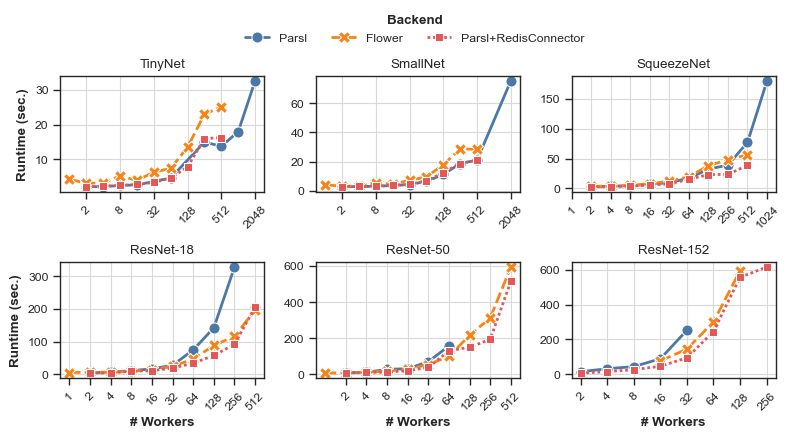

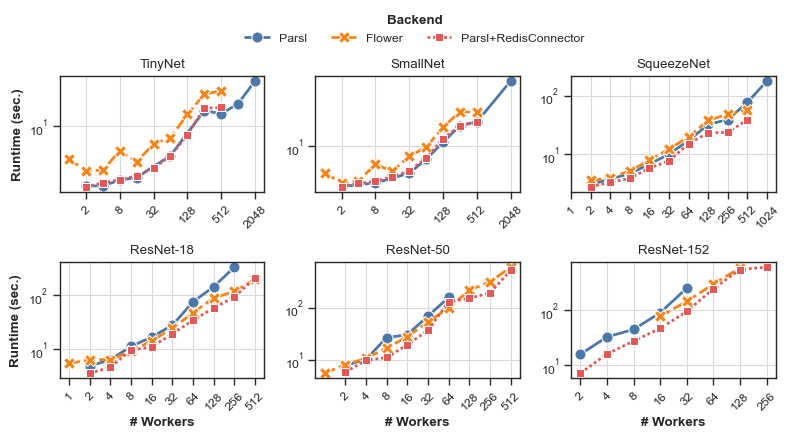

In [131]:
make_comparison_plot(df, "linear")
make_comparison_plot(df, "log")

In [129]:
tmp = df.query("backend == 'Flower'")
tmp.query("workers > 128")

,model,workers,time,backend
43,SmallNet,256,28.853614,Flower
44,ResNet-50,256,312.041317,Flower
45,TinyNet,512,25.096961,Flower
46,ResNet-18,256,116.153978,Flower
47,ResNet-50,512,593.635627,Flower
48,TinyNet,256,23.018755,Flower
49,SmallNet,512,28.351232,Flower
50,SqueezeNet,512,56.506139,Flower
51,ResNet-18,512,196.429726,Flower
52,SqueezeNet,256,47.887379,Flower
